Dino Adianto Silalahi_202331193 

import library yang di butuhkan

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

tarik dataset ke dalam jupiter untuk di kelola

In [2]:
df = pd.read_csv('R01_students_performance.csv')
df

,Study Hours (X),Exam Scores (Y)
0,1.5,60
1,2.0,65
2,2.5,73
3,3.0,75
4,2.0,62
5,3.5,85
6,4.0,92
7,3.0,78
8,1.8,63
9,4.5,95


Menampilkan beberapa baris pertama dan info umum tentang kumpulan data

In [3]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Study Hours (X)  50 non-null     float64
 1   Exam Scores (Y)  50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


(   Study Hours (X)  Exam Scores (Y)
 0              1.5               60
 1              2.0               65
 2              2.5               73
 3              3.0               75
 4              2.0               62,
 None)

Menghitung korelasi antar kolom

In [4]:
df.corr()

,Study Hours (X),Exam Scores (Y)
Study Hours (X),1.000000,0.943875
Exam Scores (Y),0.943875,1.000000


Pilih fitur (X) dan target (y), yaitu data yangakan di latih dan di uji

In [5]:
X = df[['Study Hours (X)']].values 
y = df['Exam Scores (Y)'].values 

Terapkan MinMaxScaler untuk menormalkan data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[:5], y[:5]

(array([[0.        ],
        [0.16666667],
        [0.33333333],
        [0.5       ],
        [0.16666667]]),
 array([60, 65, 73, 75, 62], dtype=int64))

Pisahkan data menjadi data latih dan data uji

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Buat model Decision Tree

In [8]:
model = LinearRegression()

Latih model dengan data latih

In [9]:
model.fit(X_train, y_train)

LinearRegression()

Ambil koefisien model untuk interpretasi

In [10]:
intercept = model.intercept_
coefficient = model.coef_[0]

intercept, coefficient

(40.2980852496873, 12.003912890086271)

Prediksi menggunakan data uji

In [11]:
y_pred = model.predict(X_test)

Evaluasi model

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 5.548911499073827
R2 Score: 0.935924809479517


Visualisasi hasil menggunakan diagram scatter plot

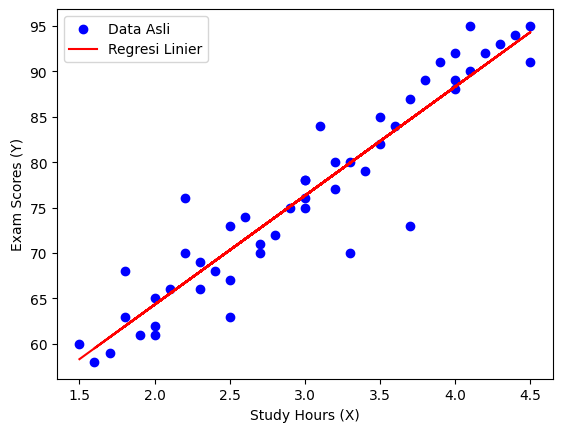

In [13]:
plt.scatter(X, y, color="blue", label="Data Asli")
plt.plot(X, model.predict(X), color="red", label="Regresi Linier")
plt.xlabel("Study Hours (X)")
plt.ylabel("Exam Scores (Y)")
plt.legend()
plt.show()

Visualisasi hasil menggunkan grafik residual

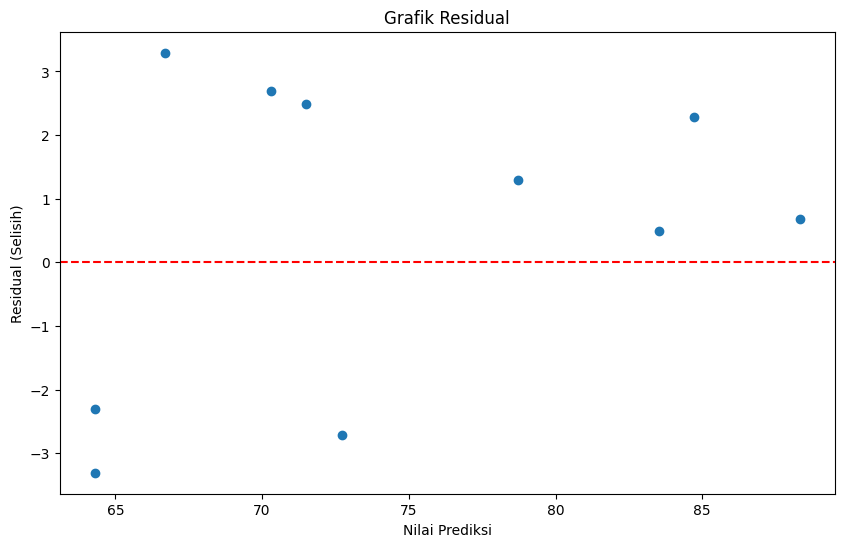

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Garis horizontal di nol
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual (Selisih)")
plt.title("Grafik Residual")
plt.show()

analisis akurasi model

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.1548574360948107
Mean Squared Error (MSE): 5.548911499073827
Root Mean Squared Error (RMSE): 2.3556127650940057
R-squared (R²): 0.935924809479517
